Collecting all the necessary functions form packages

In [182]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.color import rgb2hsv, hsv2rgb
from skimage import io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

Finding and showing the example image

(-0.5, 359.5, 639.5, -0.5)

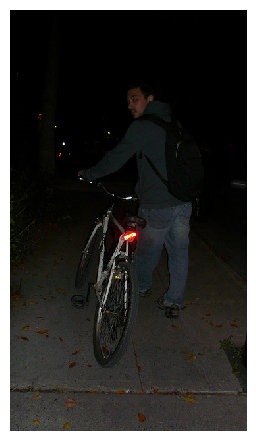

In [183]:
in_dir = "C:/Users/shaia/Pictures/Low light images/ExDark/Bicycle/"
im_name = "2015_00173.jpg"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
plt.axis("off")

Extracting the value channel of the corresponding HSV image

In [184]:
im_hsv = rgb2hsv(im_org)
V = im_hsv[:, :, 2]
V = np.uint8(V * 255)

Perform BBHE histogram equalisation

In [185]:
V_mean = np.mean(V)

V_high = V[V > V_mean]
V_low = V[V <= V_mean]

V_hhist = cv.equalizeHist(V_high)
V_lhist = cv.equalizeHist(V_low)

V_BBHE = np.zeros((V.ravel().shape[0], 1))

V_BBHE[V.ravel() <= V_mean] = V_lhist
V_BBHE[V.ravel() > V_mean] = V_hhist

plt.figure()

plt.subplot(2, 1, 1)
plt.hist(V.ravel(), bins = 256)
plt.title("Histogram of Value channel in original image")

plt.subplot(2, 1, 2)
plt.hist(V_BBHE.ravel(), bins = 256)
plt.title("Histogram equalisation of Value channel in image")

Text(0.5, 1.0, 'Histogram equalisation of Value channel in image')

Transform the enhanced image back to RGB

(-0.5, 639.5, 479.5, -0.5)

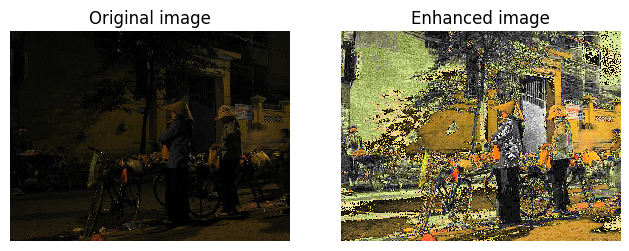

In [ ]:
im_hsv[:, :, 2] = V_BBHE.reshape(im_hsv[:, :, 2].shape)
im_enh = hsv2rgb(im_hsv)
im_enh = np.uint8(im_enh)

plt.figure()

plt.subplot(1, 2, 1)
io.imshow(im_org)
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
io.imshow(im_enh)
plt.title("Enhanced image")
plt.axis("off")

Evaluation with SSIM and PSNR

In [ ]:
eval_ssim = ssim(im_org, im_enh, data_range = im_enh.max() - im_enh.min(), win_size = 3)
eval_psnr = psnr(im_org, im_enh)

print("SSIM result:\t" + str(eval_ssim) + "\nPSNR result:\t" + str(eval_psnr))

SSIM result:	0.08877776284607122
PSNR result:	7.394963164595581
